# Welcome to Receptiviti!

We bet you have loads of text snippets that you want to understand from a psychological perspective. You're in the right place!

This Jupyter Notebook will get you started on the fundamentals of using the Receptiviti API, the variety of scores on offer and a quick sample analysis. Play around with the code on this notebook, modify it to your liking and most importantly, have buckets of fun!

Let's begin with

## Step 1 - Your API Keys
**Don't forget to add your API key and secret into the following cell**

In [13]:
API_KEY = ''
API_SECRET = ''

## Step 2 - Choose a text to analyze

Here's a sample that we really enjoy working with - Noah S. "Soggy" Sweat, Jr. gave a famous speech in 1952 on the floor of the Mississippi state legislature about whiskey.

In the following cell, we have created a list called `TEXT_SAMPLES` which contains two snippets of text that we will use to make a [bulk call to the Receptiviti API](#Step-7---Completing-a-bulk-request---Examining-the-speech-in-2-parts). 

We shall begin however, by joining these text samples into single piece of text and run through the basics of making a single call to the Receptiviti API

In [3]:
TEXT_SAMPLES = ['''My friends, I had not intended to discuss this controversial subject at this particular time. 
However, I want you to know that I do not shun controversy. On the contrary, I will take a stand on any 
issue at any time, regardless of how fraught with controversy it might be. You have asked me how I feel 
about whiskey. All right, here is how I feel about whiskey:If when you say whiskey you mean the devil's brew, 
the poison scourge, the bloody monster, that defiles innocence, dethrones reason, destroys the home, 
creates misery and poverty, yea, literally takes the bread from the mouths of little children; if you mean 
the evil drink that topples the Christian man and woman from the pinnacle of righteous, gracious living into 
the bottomless pit of degradation, and despair, and shame and helplessness, and hopelessness, then certainly 
I am against it.''',
'''But, if when you say whiskey you mean the oil of conversation, the philosophic wine, the ale that is consumed
when good fellows get together, that puts a song in their hearts and laughter on their lips, and the warm 
glow of contentment in their eyes; if you mean Christmas cheer; if you mean the stimulating drink that puts 
the spring in the old gentleman's step on a frosty, crispy morning; if you mean the drink which enables a 
man to magnify his joy, and his happiness, and to forget, if only for a little while, life's great tragedies, 
and heartaches, and sorrows; if youmean that drink, the sale of which pours into our treasuries untold 
millions of dollars, which are used to provide tender care for our little crippled children, our blind, 
our deaf, our dumb, our pitiful aged and infirm; to build highways and hospitals and schools, 
then certainly I am for it.
This is my stand. I will not retreat from it. I will not compromise.''']

SINGLE_TEXT_SAMPLE = ' '.join(TEXT_SAMPLES)
print("Let's analyze: ")
print(SINGLE_TEXT_SAMPLE)

Let's analyze: 
My friends, I had not intended to discuss this controversial subject at this particular time. 
However, I want you to know that I do not shun controversy. On the contrary, I will take a stand on any 
issue at any time, regardless of how fraught with controversy it might be. You have asked me how I feel 
about whiskey. All right, here is how I feel about whiskey:If when you say whiskey you mean the devil's brew, 
the poison scourge, the bloody monster, that defiles innocence, dethrones reason, destroys the home, 
creates misery and poverty, yea, literally takes the bread from the mouths of little children; if you mean 
the evil drink that topples the Christian man and woman from the pinnacle of righteous, gracious living into 
the bottomless pit of degradation, and despair, and shame and helplessness, and hopelessness, then certainly 
I am against it. But, if when you say whiskey you mean the oil of conversation, the philosophic wine, the ale that is consumed
when good f

## Step 3 - Install python libraries

If you are running this notebook within a Google Colab environment, you can skip ahead to [Step 4](#Step-4---Create-a-simple-API-call-helper). Google Colab provides all the requisite python libraries you will need to execute this Jupyter Notebook. 

If you are running this notebook locally or on your own server setup, determine if your system uses Conda or Pip to manage python dependencies. If you prefer Conda, follow the instructions [here](#Option-2---Conda) to install the requisite python libraries. If you prefer Pip, follow the instructions [here](#Option-3---Pip).

***Remember*** that you will only need to use either Conda ***or*** Pip to set up your python environment locally - not both. 

### Option 1 - Google Colab
Skip ahead to [Step 4](#Step-4---Create-a-simple-API-call-helper). You're all set!

### Option 2 - Conda
Uncomment the cell below and run

In [4]:
# import sys
# !conda install --yes --prefix {sys.prefix} requests pandas

### Option 3 - Pip
Uncomment the cell below and run

In [5]:
# import sys
# !{sys.executable} -m pip install requests pandas

## Step 4 - Create a simple API call helper

In [6]:
import json
import requests

def get_payload(text):
    return {
            "content": text
        }


API_URL = 'https://api.receptiviti.com/v1/score'
payload = get_payload(SINGLE_TEXT_SAMPLE)
response = requests.post(API_URL, data=json.dumps(payload), auth=(API_KEY, API_SECRET), headers = {'Content-Type': 'application/json'})
single_results = []
if response.status_code==200:
    single_results = response.json()

# print out the results
display(single_results)

{'plan_usage': {'call_limit': 100000000,
  'calls_made': 1634,
  'calls_remaining': 99998366,
  'percent_used': 0.0,
  'start_date': '2020-11-01T00:00:00Z',
  'end_date': '2020-11-30T23:59:59Z'},
 'results': [{'response_id': '83bde192-a8a1-49c7-ad02-1839c08d4394',
   'language': 'en',
   'version': 'v1.0.0',
   'summary': {'word_count': 319,
    'words_per_sentence': 35.44444444444444,
    'sentence_count': 9,
    'six_plus_words': 0.26959247648902823,
    'emojis': 0,
    'emoticons': 0,
    'hashtags': 0,
    'urls': 0},
   'liwc': {'scores': {'analytical_thinking': 61.318956905163795,
     'authentic': 33.805344081206144,
     'clout': 71.37544409613375,
     'emotional_tone': 36.82613937786352,
     'dictionary_words': 0.8808777429467085,
     'categories': {'achievement': 0.006269592476489028,
      'adjectives': 0.04075235109717868,
      'adverbs': 0.034482758620689655,
      'affect': 0.09404388714733543,
      'affiliation': 0.03134796238244514,
      'all_punctuation': 0.1755

## Step 5.1 - Convert the scores into a table format

The Receptiviti API outputs a JSON object containing scores. In the cell below, we convert this JSON object into a table format using Python library [pandas](http://pandas.pydata.org/). Once converted into a table format or a dataframe, as it is commonly known, it becomes easier to read and digest.

In [7]:
import pandas as pd

def convert_scores_to_table(results):
    liwc_scores, sallee_scores = [], []
    if len(results)>0:
        for result in results['results']:
            if 'liwc' in result:
                # Pull out liwc scores
                liwc = {'liwc_'+k:v for k,v in result['liwc']['scores']['categories'].items()}
                liwc.update({'liwc_'+k:v for k,v in result['liwc']['scores'].items() if k!='categories'})
                liwc.update({'summary_'+k:v for k,v in result['summary'].items()})
                liwc_scores.append(liwc)

            if 'sallee' in result:
                # Pull out sallee scores
                sallee = {'sallee_' + k: float(v) for k,v in result['sallee']['scores']['emotions'].items()}
                sallee.update({'sallee_' + k: float(v) for k,v in result['sallee']['scores'].items() if k!='emotions'})
                sallee.update({'summary_'+k:v for k,v in result['summary'].items()})
                sallee_scores.append(sallee)
    return (pd.DataFrame(liwc_scores), pd.DataFrame(sallee_scores))


## Step 5.2 -  Display the scores in table format

In [8]:
single_liwc_df, single_sallee_df = convert_scores_to_table(single_results)
print("LIWC as a table")
display(single_liwc_df)
print("SALLEE as a table")
display(single_sallee_df)

LIWC as a table


,liwc_achievement,liwc_adjectives,liwc_adverbs,liwc_affect,liwc_affiliation,liwc_all_punctuation,liwc_anger_words,liwc_anxiety_words,liwc_apostrophes,liwc_articles,...,liwc_emotional_tone,liwc_dictionary_words,summary_word_count,summary_words_per_sentence,summary_sentence_count,summary_six_plus_words,summary_emojis,summary_emoticons,summary_hashtags,summary_urls
0,0.00627,0.040752,0.034483,0.094044,0.031348,0.175549,0.009404,0.00627,0.009404,0.07837,...,36.826139,0.880878,319,35.444444,9,0.269592,0,0,0,0


SALLEE as a table


,sallee_admiration,sallee_amusement,sallee_anger,sallee_boredom,sallee_calmness,sallee_curiosity,sallee_desire,sallee_disgust,sallee_excitement,sallee_fear,...,sallee_sentiment,sallee_non_emotion,summary_word_count,summary_words_per_sentence,summary_sentence_count,summary_six_plus_words,summary_emojis,summary_emoticons,summary_hashtags,summary_urls
0,0.330566,0.373545,0.668046,0.309017,0.472136,0.0,0.401492,0.684442,0.450517,0.355489,...,-0.8022,0.575897,319,35.444444,9,0.269592,0,0,0,0


## Step 6 - Examine LIWC Scores

**This section will work if you see non-empty LIWC scores [above](#Step-5.2----Display-the-scores-in-table-format). Your trial might not include LIWC as an output. If you are interested in adding LIWC to your trial, please contact [sales via email](mailto:sales@receptiviti.com) or our [contact us page](https://www.receptiviti.com/contact)**

Let's start by looking at 4 very useful high level LIWC scores
* cognitive_processes - this measures the degree to which mental processes such as logic, reasoning, and problem solving are in use in the moment
* social - or social processes measures how often you refer to others, friends and family, indicating more focus or attention on them
* affect - or affective processes measures how emotional the content of your text is
* drives - this measures the focus on reward, risk, power and achievement

In the bar chart below, you can see that the Noah's speech drew on his mental energy/cognitive processes, and was fairly social in nature. He seems emotional and driven.


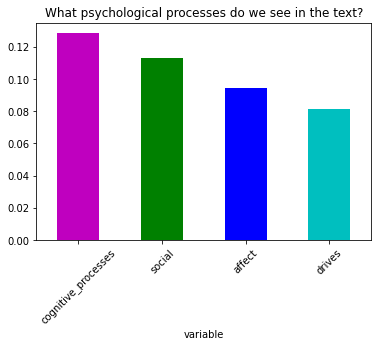

In [9]:
from IPython.display import Markdown
if len(single_liwc_df)>0:
    liwc_scores = ['cognitive_processes', 'social', 'affect', 'drives']
    axes = single_liwc_df[['liwc_'+l for l in liwc_scores]].\
            melt().\
            plot.bar(x="variable", y="value", rot=45, color=list('mgbcrky'), title="What psychological processes do we see in the text?")
    axes.get_legend().remove()
    a = axes.set_xticklabels(liwc_scores)
    print("In the bar chart below, you can see that the Noah's speech drew on his mental energy/cognitive processes, and was fairly social in nature. He seems emotional and driven.")
else:
    display(Markdown("### **Your trial might not include LIWC as an output. If you are interested in adding LIWC to your trial, please contact [sales via email](mailto:sales@receptiviti.com) or our [contact us page](https://www.receptiviti.com/contact)**"))

## Step 7 - Completing a bulk request - Examining the speech in 2 parts

Reading the text, we see a definite turn in the speech about midway. While at first Noah is harsh about the effects of whiskey, in the second half, he praises its effects. Let's examine this speech in two parts to reveal this distinct more clearly through Receptiviti's API

Let's start by creating an API helper function for a bulk request

In [10]:
import json
import requests

def get_bulk_payload(texts):
    return [{
            "content": text
        } for text in texts]


BULK_API_URL = 'https://api.receptiviti.com/v1/score/bulk'
payload = get_bulk_payload(TEXT_SAMPLES)
response = requests.post(BULK_API_URL, data=json.dumps(payload), auth=(API_KEY, API_SECRET), headers = {'Content-Type': 'application/json'})
bulk_results = []
if response.status_code==200:
    bulk_results = response.json()

# print the results
display(bulk_results)

{'plan_usage': {'call_limit': 100000000,
  'calls_made': 1636,
  'calls_remaining': 99998364,
  'percent_used': 0.0,
  'start_date': '2020-11-01T00:00:00Z',
  'end_date': '2020-11-30T23:59:59Z'},
 'results': [{'response_id': '1868e338-4719-416b-8aec-adfc7e406039',
   'language': 'en',
   'version': 'v1.0.0',
   'summary': {'word_count': 148,
    'words_per_sentence': 29.6,
    'sentence_count': 5,
    'six_plus_words': 0.2972972972972973,
    'emojis': 0,
    'emoticons': 0,
    'hashtags': 0,
    'urls': 0},
   'liwc': {'scores': {'analytical_thinking': 63.23566973566973,
     'authentic': 40.75063063063062,
     'clout': 47.2972972972973,
     'emotional_tone': 1,
     'dictionary_words': 0.8648648648648649,
     'categories': {'achievement': 0.006756756756756757,
      'adjectives': 0.02702702702702703,
      'adverbs': 0.05405405405405406,
      'affect': 0.0945945945945946,
      'affiliation': 0.006756756756756757,
      'all_punctuation': 0.17567567567567569,
      'anger_words'

In [11]:
### Display the scores in table format
bulk_liwc_df, bulk_sallee_df = convert_scores_to_table(bulk_results)
print("LIWC as a table")
display(bulk_liwc_df)
print("SALLEE as a table")
display(bulk_sallee_df)

LIWC as a table


,liwc_achievement,liwc_adjectives,liwc_adverbs,liwc_affect,liwc_affiliation,liwc_all_punctuation,liwc_anger_words,liwc_anxiety_words,liwc_apostrophes,liwc_articles,...,liwc_emotional_tone,liwc_dictionary_words,summary_word_count,summary_words_per_sentence,summary_sentence_count,summary_six_plus_words,summary_emojis,summary_emoticons,summary_hashtags,summary_urls
0,0.006757,0.027027,0.054054,0.094595,0.006757,0.175676,0.013514,0.013514,0.006757,0.081081,...,1.000000,0.864865,148,29.60,5,0.297297,0,0,0,0
1,0.005848,0.052632,0.017544,0.093567,0.052632,0.175439,0.005848,0.000000,0.011696,0.076023,...,95.416805,0.894737,171,42.75,4,0.245614,0,0,0,0


SALLEE as a table


,sallee_admiration,sallee_amusement,sallee_anger,sallee_boredom,sallee_calmness,sallee_curiosity,sallee_desire,sallee_disgust,sallee_excitement,sallee_fear,...,sallee_sentiment,sallee_non_emotion,summary_word_count,summary_words_per_sentence,summary_sentence_count,summary_six_plus_words,summary_emojis,summary_emoticons,summary_hashtags,summary_urls
0,0.166667,0.000000,0.629630,0.000000,0.333333,0.0,0.285714,0.667774,0.000000,0.425287,...,-0.908372,0.561698,148,29.60,5,0.297297,0,0,0,0
1,0.340844,0.472136,0.527864,0.401492,0.439029,0.0,0.358570,0.501553,0.551537,0.000000,...,0.833343,0.588407,171,42.75,4,0.245614,0,0,0,0


## Step 8 - Examine SALLEE scores

**This section will work if you see non-empty SALLEE scores [above](#Step-5.2----Display-the-scores-in-table-format). Your trial might not include SALLEE as an output. If you are interested in adding SALLEE to your trial, please contact [sales via email](mailto:sales@receptiviti.com) or our [contact us page](https://www.receptiviti.com/contact)**

Let's look at four emotions under SALLEE
* goodfeel - measures the extent of positive emotions
* badfeel - measures the extent of negative emotions
* love - measures feelings of love and adoration
* sadness - measures feelings of disappointment and sorrow

In the first part of the speech, Noah makes a strong case against whiskey and in the second part, he is fiercly for it.
Notice that his goodfeel and love increase, when he speaks for whiskey. The reverse happens with badfeel and sadness.
Perhaps there is a way to settle the argument and truly learn how Noah Sweat, Jr. felt during his famous speech in 1952.


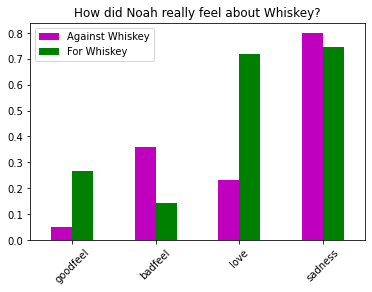

In [12]:
from IPython.display import Markdown
if len(bulk_sallee_df)>0:
    sallee_scores = ['goodfeel', 'badfeel', 'love', 'sadness']
    plot_sallee_df = pd.DataFrame({
                            'Against Whiskey': bulk_sallee_df[['sallee_'+l for l in sallee_scores]].values[0], 
                            'For Whiskey': bulk_sallee_df[['sallee_'+l for l in sallee_scores]].values[1]}, 
                            index = sallee_scores)
    axes = plot_sallee_df.\
            plot.bar(rot=45, color=list('mgbcrky'), title="How did Noah really feel about Whiskey?")
    #axes.get_legend().remove()
    a = axes.set_xticklabels(sallee_scores)
    print("In the first part of the speech, Noah makes a strong case against whiskey and in the second part, he is fiercly for it.\n"+
    "Notice that his goodfeel and love increase, when he speaks for whiskey. The reverse happens with badfeel and sadness.\n"+
    "Perhaps there is a way to settle the argument and truly learn how Noah Sweat, Jr. felt during his famous speech in 1952.")
else:
    display(Markdown("### **Your trial might not include SALLEE as an output. If you are interested in adding SALLEE to your trial, please contact [sales via email](mailto:sales@receptiviti.com) or our [contact us page](https://www.receptiviti.com/contact)**"))
    